In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

from sklearn.metrics import classification_report

In [ ]:
class_names = [
 "T-shirt/top",
 "Trouser",
 "Pullover",
 "Dress",
 "Coat",
 "Sandal",
 "Shirt",
 "Sneaker",
 "Bag",
 "Ankle boot"    
]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train_col = X_train
print(f"X_train's shape is {X_train.shape}")
print(f"y_train's shape is {y_train.shape}")
print(f"y_train has {np.max(y_train) + 1} classes")

X_train's shape is (60000, 28, 28)
y_train's shape is (60000,)
y_train has 10 classes


In [ ]:
# We want to add channels to our X data, so that they
# are compatible with the Convolutional Layers

# The idea here is that we are working in greyscale
# So the image has 1 channel

# The image data is of shape (N, im_height, im_width, channels)
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

print(X_train.shape)
print(X_test.shape)
print(f"The maximum value of X_train is {np.max(X_train)}. We don't want this, because it'll make training longer")

X_train = X_train / 255
X_test = X_test / 255

print(f"Now the maximum value of X_train is {np.max(X_train)}. We have now scaled our training data.")

(60000, 28, 28, 1)
(10000, 28, 28, 1)
The maximum value of X_train is 255. We don't want this, because it'll make training longer
Now the maximum value of X_train is 1.0. We have now scaled our training data.


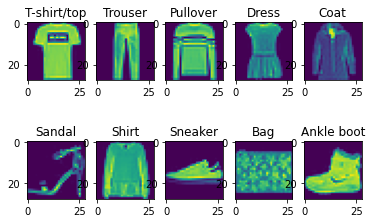

In [ ]:
# Let's take a look at some of these images

fig, ax = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        ind = (i * 5) + j
        ds_ex = np.where(y_train == ind)[0][0]        
        ax[i, j].imshow(X_train_col[ds_ex, ...])
        ax[i, j].set_title(class_names[ind])
plt.show()

In [ ]:
def to_one_hot(y):
    """
    Input: y of shape (n_samples)
    Output: y of shape (n_samples, n_classes)
    """
    onehot = np.zeros((y.shape[0], len(class_names)))
    onehot[np.arange(y.shape[0]), y] = 1
#     for i in range(len(y)):
#         onehot[i, y[i]] = 1
    return onehot

In [ ]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils


model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), strides = (1,1), 
                 padding='valid',activation='relu')) #add in some convolutional 
                 #layers to coalesce the image data
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))#bool the convolution
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), strides = (1,1), 
                 padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=250, verbose=2)
# Final evaluation of the model

Epoch 1/40
240/240 - 2s - loss: 0.6943 - accuracy: 0.7477 - val_loss: 0.4777 - val_accuracy: 0.8264 - 2s/epoch - 8ms/step
Epoch 2/40
240/240 - 1s - loss: 0.4379 - accuracy: 0.8424 - val_loss: 0.3991 - val_accuracy: 0.8592 - 1s/epoch - 5ms/step
Epoch 3/40
240/240 - 1s - loss: 0.3844 - accuracy: 0.8618 - val_loss: 0.3600 - val_accuracy: 0.8713 - 1s/epoch - 5ms/step
Epoch 4/40
240/240 - 1s - loss: 0.3508 - accuracy: 0.8739 - val_loss: 0.3293 - val_accuracy: 0.8808 - 1s/epoch - 5ms/step
Epoch 5/40
240/240 - 1s - loss: 0.3278 - accuracy: 0.8811 - val_loss: 0.3146 - val_accuracy: 0.8845 - 1s/epoch - 5ms/step
Epoch 6/40
240/240 - 1s - loss: 0.3093 - accuracy: 0.8879 - val_loss: 0.3017 - val_accuracy: 0.8904 - 1s/epoch - 5ms/step
Epoch 7/40
240/240 - 1s - loss: 0.2919 - accuracy: 0.8942 - val_loss: 0.3014 - val_accuracy: 0.8906 - 1s/epoch - 5ms/step
Epoch 8/40
240/240 - 1s - loss: 0.2837 - accuracy: 0.8960 - val_loss: 0.2809 - val_accuracy: 0.8989 - 1s/epoch - 5ms/step
Epoch 9/40
240/240 - 1s 

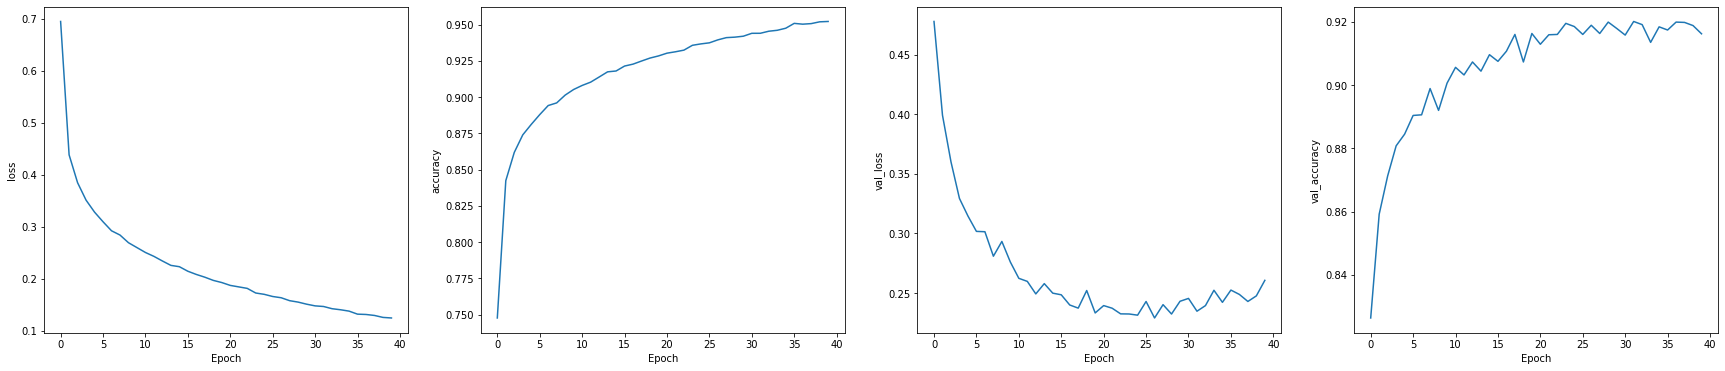

In [ ]:
def plot_history(h):
    fig, ax = plt.subplots(1, 4, figsize=(30,6))
    for i, k in enumerate(h.keys()):
        ax[i].plot(h[k])
        ax[i].set_xlabel("Epoch")
        ax[i].set_ylabel(k)
    plt.show()
        
plot_history(hist.history)



In [ ]:
y_pred = model.predict(X_test, batch_size=250 , verbose=0)
#classification report for the model
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
#The model performs pretty well, not perfectly, but pretty well

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.90      0.88      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.85      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.76      0.76      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

